# تمرین ۲ جست و جوی تصویر با استفاده از هیستوگرام
الگوریتمی توسعه دهید بوسیله آن بتوان قطعه تصویری را در تصویر دیگر جستجو نمود. برای این موضوع لازم است هیستوگرام را
برای قطعه تصویر محاسبه نماید. سپس پنجره ای را در تصویر هدف انتقال داده و در هر انتقال قطعه ای از تصویر را جدا و هیستوگرام
آن را محاسبه نماید. هیستوگرام قطعه تصویر را با قطعه جستجو شده مقایسه نماید. سپس قطعه ای از تصویر را انتخاب نماید که
بیشترین شباهت را به هیستوگرام قطعه جستجو شده را داشته باشد.

### Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Compare given histogram with the given image function

In [2]:
def hist_comparator(hist, image):
    image_hist = cv2.calcHist([image], [0], None, [256], [0, 255])
    return np.abs(hist - image_hist).sum() / (image.shape[0] * image.shape[1])

در این تابع  ابتدا هیستوگرام تصویر داده شده محاسبه می شود و سپس اختلاف آن با هیستوگرام داده شده سنجیده می شود و عددی به عنوان میزان اختلاف بازگردانده می شود
الگوریتم به کار رفته برای انجام این مقایسه به این صورت عمل می کند که نظیر به نظیر دو هیستوگرام را تطبیق داده و قدر مطلق اختلاف عدد های آن ها محاسبه می شود و در نهایت این مقدادیر با هم جمع می شوند
بدیهیست هرچقد مقدار خروجی بالا تر باشد نشان دهنده بیشتر بود اختلاف بین دو تصویر است
هر چند صفر بودن این مقدار به معنای یکی بودن هیستوگرام ها می باشد و امکان دارد دو تصویر متفاوت اما با هیستوگرام های یکسان داشته باشیم اما این روش همچنان برای مقایسه روش نسبتا خوبی قلمداد می شود.
عدد نهایی بر سایز تصویر تقسیم شده تا خروجی مستقل از ابعاد تصویر، بین صفر تا یک باشد

## Searching target image inside the source image function

In [3]:
def search_in_image(source, target, step):
    height = range(0, source.shape[0] - target.shape[0], step)
    width = range(0, source.shape[1] - target.shape[1], step)
    target_hist = cv2.calcHist([target], [0], None, [256], [0, 255])
    mini = -1
    ans = (-1, -1)
    for i in height:
        for j in width:
            cropped_image = np.array(source)[i:i + target.shape[0], j:j + target.shape[1], :]
            temp_res = hist_comparator(target_hist, cropped_image)
            if temp_res < mini or mini == -1:
                mini = temp_res
                ans = (i, j)
    return np.array(source)[ans[0]:ans[0] + target.shape[0], ans[1]:ans[1] + target.shape[1], :]

در این تابع به کمک تابع مقایسه هیستوگرام ها عمل پیدا کردن قطعه تصویر مورد نظر بر روی کل تصویر پیاده سازی شده است. به وسیله دو حلقه در هر مرحله تصویری به اندازه تصویر هدف از تصویر اصلی جدا شده و عمل مقایسه صورت میگیرد در صورتی که عدد به دست امده از مقادیر قبلی کمتر باشد(تصویر شباهت بیشتری داشته باشد) به عنوان تصویر انتخابی فعلی ذخیره می شود در نهایت تصویر انتخابی به عنوان خروجی تابع بازگردانده می شود. برای تسریع در اجرای کد متغییری تحت عنوان قدم در نظر گرفته شده که اندازه دریچه در هر مرحله از اجرای حلقه به تعداد قدم پیکسل جابجا شود. 

### Reading the original image and the target image

In [4]:
source_image = cv2.imread("messi5.jpg", cv2.IMREAD_UNCHANGED)
target_image = cv2.imread("ball.png", cv2.IMREAD_UNCHANGED)

### Applying the algorithm and showing the result

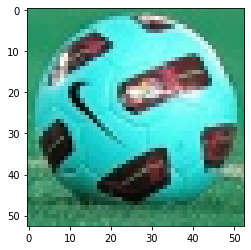

In [5]:
detected_image = search_in_image(source_image, target_image, 1)
plt.imshow(detected_image)
plt.show()

## نتیجه گیری
مقایسه هیستوگرام ها برای تشخیص شباهت دو تصویر روشی به نسبت مناسب و دارای سرعت قابل قبول است. روش های دیگر برای مقایسه دو هیستوگرام در این لینک قابل مطالعه هستند
https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html


## تجربیات و مشکلات
در ابتدا سعی شد توابع اعمال ریاضی بر روی ارایه هیستوگرام تماما پیاده سازی شود و اینکار نیز صورت گرفت اما سرعت اجرا به شدت تحت تاثیر این امر قرار گرفت به نحوی که با قدم ۵ نیاز به زمانی در حد چند ثانیه وجود داشت اما با استفاده از توابع کتابخانه نام پای کلیه اعمال ماتریسی با سرعت بالاتری اجرا می شوند و نسبت به انجام این عملیات ها با حلقه فور از عمکرد بهتری برخوردار هستند. به همین دلیل در ادامه نیز سعی شده برای اعمال عملیات های ماتریسی از توابع این کتابخانه بهره گرفته شود